In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_fill), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_fill[:5000], y_train_fill[5000:]

In [7]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.9317 - accuracy: 0.6944 - val_loss: 0.5234 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5008 - accuracy: 0.8256 - val_loss: 0.4371 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4498 - accuracy: 0.8406 - val_loss: 0.5114 - val_accuracy: 0.8082
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4218 - accuracy: 0.8531 - val_loss: 0.3958 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4082 - accuracy: 0.8569 - val_loss: 0.3794 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3769 - accuracy: 0.8670 - val_loss: 0.3747 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3662 - accuracy: 0.8711 - val_loss: 0.3713 - val_accuracy:

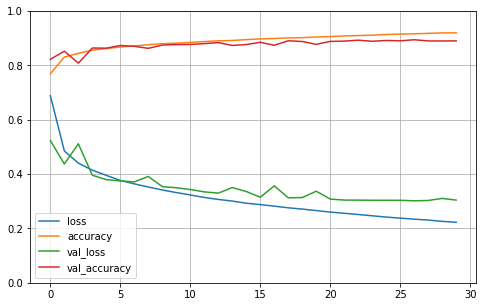

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 894us/step - loss: 73.0410 - accuracy: 0.8393


[73.04102325439453, 0.8392999768257141]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_pred = model.predict_classes(X_new)

/Users/emaghakyan/projects/ml_book/e2e_ml_project/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
y_pred

array([9, 2, 1])

In [18]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [19]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [20]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10)                0

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9317 - accuracy: 0.6945 - val_loss: 0.5224 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5006 - accuracy: 0.8256 - val_loss: 0.4368 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4498 - accuracy: 0.8406 - val_loss: 0.5108 - val_accuracy: 0.8094
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4218 - accuracy: 0.8529 - val_loss: 0.3952 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4080 - accuracy: 0.8576 - val_loss: 0.3794 - val_accuracy: 0.8634
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3765 - accuracy: 0.8672 - val_loss: 0.3741 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3658 - accuracy: 0.8710 - val_loss: 0.3702 - val_accuracy:

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.5306 - accuracy: 0.8415


[2.530618667602539, 0.8414999842643738]

In [25]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax"),
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7342 - accuracy: 0.7447 - val_loss: 0.4662 - val_accuracy: 0.8398
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4513 - accuracy: 0.8377 - val_loss: 0.4056 - val_accuracy: 0.8608
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4135 - accuracy: 0.8515 - val_loss: 0.4950 - val_accuracy: 0.8092
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3947 - accuracy: 0.8585 - val_loss: 0.3808 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3876 - accuracy: 0.8628 - val_loss: 0.3757 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3583 - accuracy: 0.8705 - val_loss: 0.3656 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3536 - accuracy: 0.8740 - val_loss: 0.3633 - val_accuracy:

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 112.6321 - accuracy: 0.5160


[112.63206481933594, 0.515999972820282]

In [30]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7333 - accuracy: 0.7529 - val_loss: 0.4247 - val_accuracy: 0.8568
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4519 - accuracy: 0.8402 - val_loss: 0.3887 - val_accuracy: 0.8648
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4129 - accuracy: 0.8548 - val_loss: 0.3867 - val_accuracy: 0.8656
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3864 - accuracy: 0.8625 - val_loss: 0.3619 - val_accuracy: 0.8752
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8653 - val_loss: 0.3493 - val_accuracy: 0.8760
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3444 - accuracy: 0.8752 - val_loss: 0.3478 - val_accuracy: 0.8776
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3378 - accuracy: 0.8794 - val_loss: 0.3398 - val_accuracy:

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 597.6266 - accuracy: 0.2301


[597.6265869140625, 0.23010000586509705]